# Stock Market API

In this exercise, we are going to play around with the stock market API [iexcloud.io](https://iexcloud.io).

The API documentation page of iexcloud.io can be found [here](https://iexcloud.io/docs/api/).

Before we can use the API, we need to register and get an API key.

In [121]:
# Let's start with some imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import requests

In [122]:
import os

# We assign an environmental variable with the API key
# os.environ['IEXCLOUD_API_KEY'] = SECRET_KEY

# Or we can also just publish it here since it is a public key
PUBLIC_API_KEY = 'pk_ea47f959a3b4476cac4d30873370b5b0'

# Base URL
base_url = 'https://cloud.iexapis.com/'

# Get my personal API key from the environmental variable
PUBLIC_API_KEY = os.environ.get('IEXCLOUD_API_KEY')
print(PUBLIC_API_KEY)

pk_ea47f959a3b4476cac4d30873370b5b0


In [123]:
# Set ticker and time period
symbol = 'aapl'
time_range = '3m'

# Call the Apple stock for the last 3 months
aapl_url = f'{base_url}stable/stock/{symbol}/chart/{time_range}?token={PUBLIC_API_KEY}'

# Let's call the API wit our url to get the data for appl in a JSON format
api_data = requests.get(aapl_url).json()
api_data

0,
  'changePercent': 0,
  'label': 'May 1, 20',
  'changeOverTime': 0},
 {'date': '2020-05-04',
  'open': 289.17,
  'close': 293.16,
  'high': 293.69,
  'low': 286.32,
  'volume': 33391986,
  'uOpen': 289.17,
  'uClose': 293.16,
  'uHigh': 293.69,
  'uLow': 286.32,
  'uVolume': 33391986,
  'change': 4.09,
  'changePercent': 1.4149,
  'label': 'May 4, 20',
  'changeOverTime': 0.014149},
 {'date': '2020-05-05',
  'open': 295.06,
  'close': 297.56,
  'high': 301,
  'low': 294.46,
  'volume': 36937795,
  'uOpen': 295.06,
  'uClose': 297.56,
  'uHigh': 301,
  'uLow': 294.46,
  'uVolume': 36937795,
  'change': 4.4,
  'changePercent': 1.5009,
  'label': 'May 5, 20',
  'changeOverTime': 0.02937},
 {'date': '2020-05-06',
  'open': 300.46,
  'close': 300.63,
  'high': 303.24,
  'low': 298.87,
  'volume': 35583438,
  'uOpen': 300.46,
  'uClose': 300.63,
  'uHigh': 303.24,
  'uLow': 298.87,
  'uVolume': 35583438,
  'change': 3.07,
  'changePercent': 1.0317,
  'label': 'May 6, 20',
  'changeOverTi

In [124]:
# Now we create a dataframe based on the JSON file
aapl_df = pd.DataFrame.from_dict(api_data)
aapl_df

,date,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime
0,2020-05-01,286.25,289.07,299.00,285.85,60154175,286.25,289.07,299.00,285.85,60154175,0.00,0.0000,"May 1, 20",0.000000
1,2020-05-04,289.17,293.16,293.69,286.32,33391986,289.17,293.16,293.69,286.32,33391986,4.09,1.4149,"May 4, 20",0.014149
2,2020-05-05,295.06,297.56,301.00,294.46,36937795,295.06,297.56,301.00,294.46,36937795,4.40,1.5009,"May 5, 20",0.029370
3,2020-05-06,300.46,300.63,303.24,298.87,35583438,300.46,300.63,303.24,298.87,35583438,3.07,1.0317,"May 6, 20",0.039990
4,2020-05-07,303.22,303.74,305.17,301.97,28803764,303.22,303.74,305.17,301.97,28803764,3.11,1.0345,"May 7, 20",0.050749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2020-07-27,374.84,379.24,379.62,373.92,30303548,374.84,379.24,379.62,373.92,30303548,8.78,2.3700,"Jul 27, 20",0.311931
60,2020-07-28,377.47,373.01,378.20,372.99,25906375,377.47,373.01,378.20,372.99,25906375,-6.23,-1.6428,"Jul 28, 20",0.290379
61,2020-07-29,375.00,380.16,380.92,374.85,22582314,375.00,380.16,380.92,374.85,22582314,7.15,1.9168,"Jul 29, 20",0.315114
62,2020-07-30,376.75,384.76,385.19,375.07,39532505,376.75,384.76,385.19,375.07,39532505,4.60,1.2100,"Jul 30, 20",0.331027


In [125]:
# First things first, we will have a look at the columns
appl_df.dtypes

date              datetime64[ns]
open                     float64
close                    float64
high                     float64
low                      float64
volume                     int64
uOpen                    float64
uClose                   float64
uHigh                    float64
uLow                     float64
uVolume                    int64
change                   float64
changePercent            float64
label                     object
changeOverTime           float64
dtype: object

In [126]:
# We would like to convert the date column to a datetime object
appl_df['date'] = pd.to_datetime(aapl_df['date'])
aapl_df.dtypes

date               object
open              float64
close             float64
high              float64
low               float64
volume              int64
uOpen             float64
uClose            float64
uHigh             float64
uLow              float64
uVolume             int64
change            float64
changePercent     float64
label              object
changeOverTime    float64
dtype: object

In [127]:
# Noe we set the date as the index
aapl_df.set_index('date')

,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime
date,,,,,,,,,,,,,,
2020-05-01,286.25,289.07,299.00,285.85,60154175,286.25,289.07,299.00,285.85,60154175,0.00,0.0000,"May 1, 20",0.000000
2020-05-04,289.17,293.16,293.69,286.32,33391986,289.17,293.16,293.69,286.32,33391986,4.09,1.4149,"May 4, 20",0.014149
2020-05-05,295.06,297.56,301.00,294.46,36937795,295.06,297.56,301.00,294.46,36937795,4.40,1.5009,"May 5, 20",0.029370
2020-05-06,300.46,300.63,303.24,298.87,35583438,300.46,300.63,303.24,298.87,35583438,3.07,1.0317,"May 6, 20",0.039990
2020-05-07,303.22,303.74,305.17,301.97,28803764,303.22,303.74,305.17,301.97,28803764,3.11,1.0345,"May 7, 20",0.050749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,374.84,379.24,379.62,373.92,30303548,374.84,379.24,379.62,373.92,30303548,8.78,2.3700,"Jul 27, 20",0.311931
2020-07-28,377.47,373.01,378.20,372.99,25906375,377.47,373.01,378.20,372.99,25906375,-6.23,-1.6428,"Jul 28, 20",0.290379
2020-07-29,375.00,380.16,380.92,374.85,22582314,375.00,380.16,380.92,374.85,22582314,7.15,1.9168,"Jul 29, 20",0.315114


<AxesSubplot:>

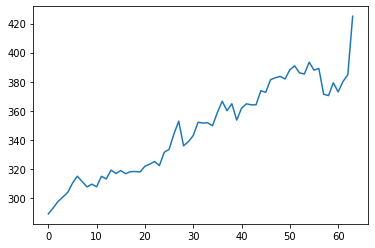

In [128]:
# Now let/s plot the closing prices
aapl_df['close'].plot()

<AxesSubplot:>

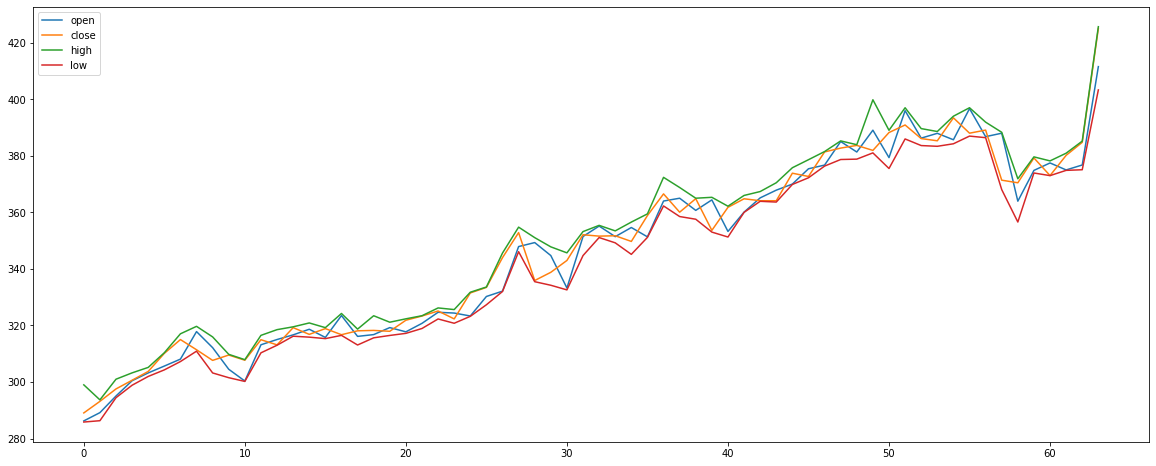

In [129]:
# To make the different values more readable, we use the figsize attribute to adjust the width and height
aapl_df[['open', 'close', 'high', 'low']].plot(figsize=(20,8))

In [130]:
# Let's get Amazon stock prices since last year
symbol = 'amzn'
time_range = '1y'

# Call the Amazon stock for the last year
amzn_url = f'{base_url}stable/stock/{symbol}/chart/{time_range}?token={PUBLIC_API_KEY}'

# Let's call the API wit our url to get the data for appl in a JSON format
api_data = requests.get(amzn_url).json()

# Now we create a dataframe based on the JSON file
amzn_df = pd.DataFrame.from_dict(api_data)

# We would like to convert the date column to a datetime object
amzn_df['date'] = pd.to_datetime(amzn_df['date'])

# Noe we set the date as the index
amzn_df.set_index('date')


,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime
date,,,,,,,,,,,,,,
2019-08-01,1871.72,1855.32,1897.92,1844.01,4713311,1871.72,1855.32,1897.92,1844.01,4713311,0.00,0.0000,"Aug 1, 19",0.000000
2019-08-02,1845.07,1823.24,1846.36,1808.02,4956225,1845.07,1823.24,1846.36,1808.02,4956225,-32.08,-1.7291,"Aug 2, 19",-0.017291
2019-08-05,1770.22,1765.13,1788.67,1748.78,6058212,1770.22,1765.13,1788.67,1748.78,6058212,-58.11,-3.1872,"Aug 5, 19",-0.048612
2019-08-06,1792.23,1787.83,1793.77,1753.40,5070258,1792.23,1787.83,1793.77,1753.40,5070258,22.70,1.2860,"Aug 6, 19",-0.036376
2019-08-07,1773.99,1793.40,1798.93,1757.00,4526884,1773.99,1793.40,1798.93,1757.00,4526884,5.57,0.3116,"Aug 7, 19",-0.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,3062.00,3055.21,3098.00,3015.77,4170492,3062.00,3055.21,3098.00,3015.77,4170492,46.30,1.5388,"Jul 27, 20",0.646729
2020-07-28,3054.27,3000.33,3077.09,2995.76,3126651,3054.27,3000.33,3077.09,2995.76,3126651,-54.88,-1.7963,"Jul 28, 20",0.617150
2020-07-29,3030.99,3033.53,3039.16,2996.77,2974060,3030.99,3033.53,3039.16,2996.77,2974060,33.20,1.1065,"Jul 29, 20",0.635044


In [131]:
# Let's get Facebook statistics
symbol = 'fb'

# Call the Facebook stats
fb_url = f'{base_url}/stable/stock/{symbol}/stats/?token={PUBLIC_API_KEY}'

# Let's call the API with our url to get the data for appl in a JSON format
fb_marketcap = requests.get(fb_url).json()['marketcap']

fb_marketcap

723302319785

In [132]:
# Let's get Facebook statistics
symbol = 'aapl'
time = 'quarter'

# Call the Facebook stats
aapl_url = f'{base_url}stable/stock/{symbol}/financials?token={PUBLIC_API_KEY}'

# Let's call the API with our url to get the data for appl in a JSON format
aapl_research = requests.get(aapl_url)

In [133]:
# Let's get the latest news of Tesla
symbol = 'tsla'

# Call the Facebook stats
tsla_url = f'{base_url}stable/stock/{symbol}/news/last/1?token={PUBLIC_API_KEY}'

# Let's call the API with our url to get the data for appl in a JSON format
tsla_news = requests.get(tsla_url).json()
tsla_news

[{'datetime': 1596352533000,
  'headline': 'Tesla könnte mit neuer Fabrik schneller als in China sein',
  'source': 'T-Online',
  'url': 'https://cloud.iexapis.com/v1/news/article/60617163-72e0-4b30-8900-47287eccee43',
  'summary': 'Die Fabrik von US-Elektroautobauer Tesla in Grünheide bei Berlin könnte nach Ansicht von Brandenburgs Wirtschaftsminister Jörg Steinbach (SPD) schneller gebaut werden als ein schon bestehendes Werk in China. "Das Ziel bei Tesla scheint es zu sein, die Bauzeit der "Gigafactory 3" in Shanghai noch ein',
  'related': 'TSLA',
  'image': 'https://cloud.iexapis.com/v1/news/image/60617163-72e0-4b30-8900-47287eccee43',
  'lang': 'de',
  'hasPaywall': False}]

In [134]:
# Let's get the latest news of Tesla
sector = 'energy'

# Call the Facebook stats
energy_url = f'{base_url}stable/stock/market/sector-performance?token={PUBLIC_API_KEY}'

# Let's call the API with our url to get the data for appl in a JSON format
energy_performance = requests.get(energy_url)

In [135]:
amzn_df

,date,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime
0,2019-08-01,1871.72,1855.32,1897.92,1844.01,4713311,1871.72,1855.32,1897.92,1844.01,4713311,0.00,0.0000,"Aug 1, 19",0.000000
1,2019-08-02,1845.07,1823.24,1846.36,1808.02,4956225,1845.07,1823.24,1846.36,1808.02,4956225,-32.08,-1.7291,"Aug 2, 19",-0.017291
2,2019-08-05,1770.22,1765.13,1788.67,1748.78,6058212,1770.22,1765.13,1788.67,1748.78,6058212,-58.11,-3.1872,"Aug 5, 19",-0.048612
3,2019-08-06,1792.23,1787.83,1793.77,1753.40,5070258,1792.23,1787.83,1793.77,1753.40,5070258,22.70,1.2860,"Aug 6, 19",-0.036376
4,2019-08-07,1773.99,1793.40,1798.93,1757.00,4526884,1773.99,1793.40,1798.93,1757.00,4526884,5.57,0.3116,"Aug 7, 19",-0.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-07-27,3062.00,3055.21,3098.00,3015.77,4170492,3062.00,3055.21,3098.00,3015.77,4170492,46.30,1.5388,"Jul 27, 20",0.646729
249,2020-07-28,3054.27,3000.33,3077.09,2995.76,3126651,3054.27,3000.33,3077.09,2995.76,3126651,-54.88,-1.7963,"Jul 28, 20",0.617150
250,2020-07-29,3030.99,3033.53,3039.16,2996.77,2974060,3030.99,3033.53,3039.16,2996.77,2974060,33.20,1.1065,"Jul 29, 20",0.635044
251,2020-07-30,3014.00,3051.88,3092.00,3005.00,6128265,3014.00,3051.88,3092.00,3005.00,6128265,18.35,0.6049,"Jul 30, 20",0.644935
